In [208]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [209]:
df = pd.read_csv('train.csv')

In [210]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [211]:
(df.groupby('price_range').describe().T)

price_range                    0            1            2            3
battery_power count   500.000000   500.000000   500.000000   500.000000
              mean   1116.902000  1228.868000  1228.320000  1379.984000
              std     410.801305   438.614528   452.863065   414.992261
              min     503.000000   501.000000   501.000000   503.000000
              25%     770.500000   843.000000   816.500000  1034.750000
...                          ...          ...          ...          ...
wifi          min       0.000000     0.000000     0.000000     0.000000
              25%       0.000000     0.000000     0.000000     0.000000
              50%       0.000000     1.000000     1.000000     1.000000
              75%       1.000000     1.000000     1.000000     1.000000
              max       1.000000     1.000000     1.000000     1.000000

[160 rows x 4 columns]

In [212]:
df = df.fillna(df.mean())

In [213]:
X = np.array(df)[:,:-1]
Y = np.array(df)[:,-1]

In [214]:
best_columns = list(df.columns[np.where(SelectKBest(chi2, k=2).fit(X,Y).get_support())])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


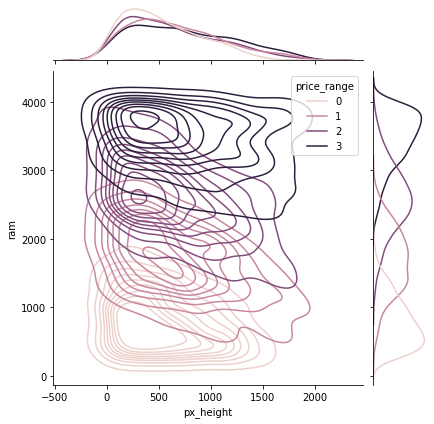

In [215]:
sns.jointplot(best_columns[0],best_columns[1],df,hue='price_range',kind='kde')

In [216]:
pca_dims = pd.DataFrame(PCA(2).fit(X,Y).transform(X),columns = ('D1','D2'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


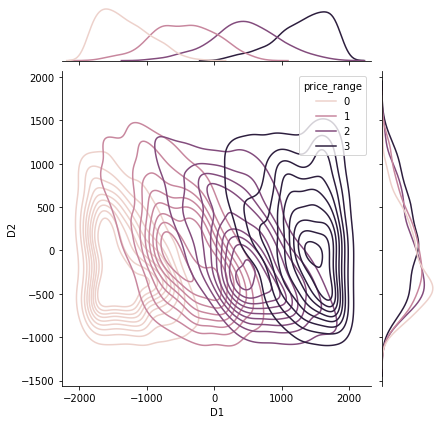

In [25]:
sns.jointplot('D1','D2',pca_dims,hue=df['price_range'],kind='kde')

In [217]:
df_test = pd.read_csv('test.csv')

In [218]:
X_test = np.array(df_test)[:,:-1]
Y_test = np.array(df_test)[:,-1]

In [219]:
#Random Forest Is Usually a Good Classifier for Multiclass Problems With Varying Data Types So Try First
rf = RandomForestClassifier(n_estimators = 101,max_depth = 3)

In [220]:
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [221]:
rf.score(X_test,Y_test)

0.488

In [222]:
##See accuracy of Naive Bayes Model
nb = GaussianNB()

In [223]:
nb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [224]:
nb.score(X_test,Y_test)

0.419

In [225]:
#K-Nearest Neighbors can Also Function as Good Multiclass Classifier for Small Dataset
knn = KNeighborsClassifier()

In [226]:
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [227]:
knn.score(X_test,Y_test)

0.493